In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [3]:
data = pd.read_csv('train_LZdllcl.csv')

## Objective :
  
### Create a machine learning model that can help HR determine whether an employee is worth the promotion or not

## Goals :

### Increase speed and effectiveness in the employee promotion evaluation process

In [4]:
data.drop_duplicates()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [5]:
data['is_promoted']

0        0
1        0
2        0
3        0
4        0
        ..
54803    0
54804    0
54805    0
54806    0
54807    0
Name: is_promoted, Length: 54808, dtype: int64

In [6]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


<AxesSubplot:>

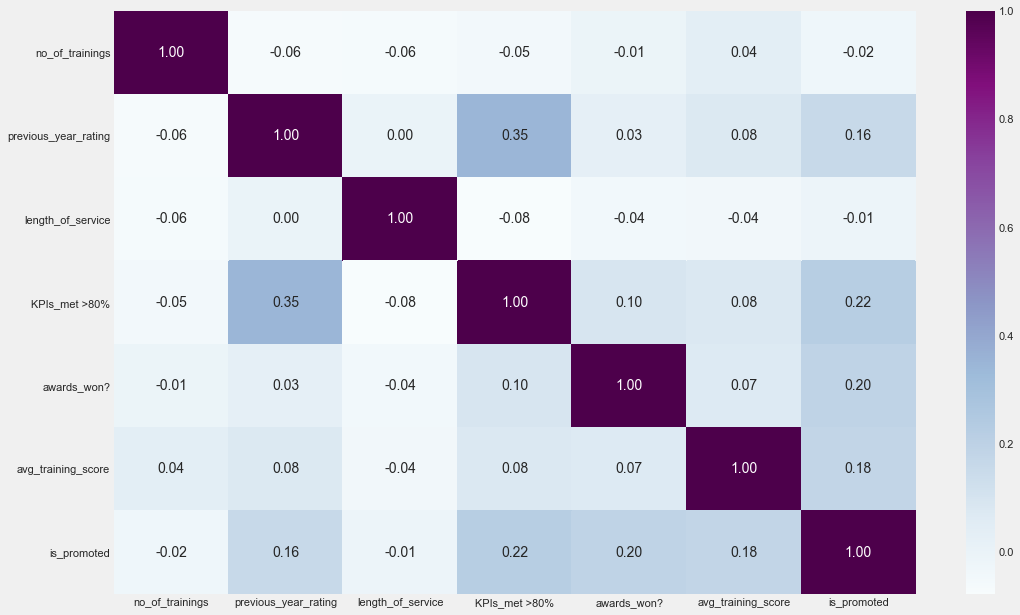

In [7]:
features = ['no_of_trainings','previous_year_rating','length_of_service','KPIs_met >80%','awards_won?','avg_training_score', 'is_promoted']
corr_= data[features].corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

In [8]:
numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
display(data.select_dtypes(include=numerics).columns)
print(data.select_dtypes(include=numerics).shape)
data_num = data.select_dtypes(include=numerics)

Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

(54808, 9)


In [9]:
display(data.select_dtypes(include=['object']).columns)
print(data.select_dtypes(include=object).shape)
data_cat = data.select_dtypes(include=['object']).reset_index()

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

(54808, 5)


# Exploratory Data Analysis

## Visualization

## Awards Won

In [10]:
award_0 = data[data['awards_won?']==0]
award_0 = award_0.groupby(['is_promoted']).agg({'employee_id' : ['count']}).reset_index()
award_0.columns = ['is_promoted','jumlah']
award_0

,is_promoted,jumlah
0,0,49429
1,1,4109


In [11]:
award_1 = data[data['awards_won?']==1]
award_1 = award_1.groupby(['is_promoted']).agg({'employee_id' : ['count']}).reset_index()
award_1.columns = ['is_promoted','jumlah']
award_1

,is_promoted,jumlah
0,0,711
1,1,559


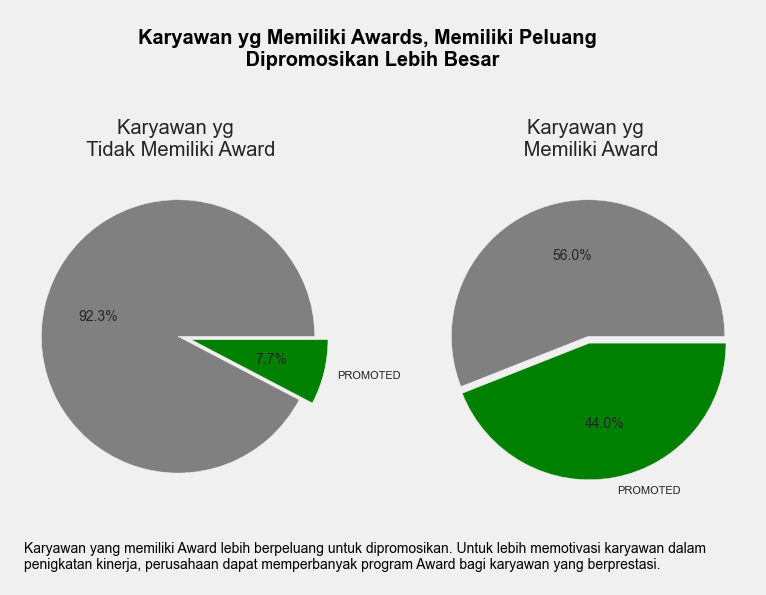

In [12]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.pie(x='jumlah',autopct='%.1f%%',labels=['','PROMOTED'],explode=[0,0.1],colors=['grey','green'],data=award_0)
ax2.pie(x='jumlah',autopct='%.1f%%',labels=['','PROMOTED'],explode=[0,0.05],colors=['grey','green'],data=award_1)
ax1.set_title('Karyawan yg \n Tidak Memiliki Award',pad=10)
ax2.set_title('Karyawan yg \n Memiliki Award',pad=10)

text = '''
Karyawan yang memiliki Award lebih berpeluang untuk dipromosikan. Untuk lebih memotivasi karyawan dalam
penigkatan kinerja, perusahaan dapat memperbanyak program Award bagi karyawan yang berprestasi.
'''

fig.text(0.1,-0.1,text,color='Black',fontsize=14);

text = '''
Karyawan yg Memiliki Awards, Memiliki Peluang \n Dipromosikan Lebih Besar

'''

fig.text(0.5, 1,text,color='Black',fontsize=20, fontweight='bold',ha='center');

plt.savefig('awards.png');

## Length Of Service

In [13]:
data_los = data.groupby(['length_of_service','is_promoted']).agg({'age' : ['count']}).reset_index()
data_los.columns = ['length_of_service','promoted','total']
data_los

,length_of_service,promoted,total
0,1,0,4170
1,1,1,377
2,2,0,6089
3,2,1,595
4,3,0,6424
...,...,...,...
59,32,1,2
60,33,0,9
61,34,0,3
62,34,1,1


In [14]:
data_lospy = data_los[data_los['promoted']==1]
data_lospn = data_los[data_los['promoted']==0]

In [15]:
data_lospy = data_lospy.drop(['promoted'],axis = 1)
data_lospn = data_lospn.drop(['promoted'],axis = 1)

In [16]:
data_lospy.columns=['length_of_service','promoted_yes']
data_lospn.columns=['length_of_service','promoted_no']

In [17]:
data_los_1 = data_lospy.merge(data_lospn,
          on = 'length_of_service',
          how = 'outer'
          )

In [18]:
data_los_1['total'] = data_los_1['promoted_yes'] + data_los_1['promoted_no']
data_los_1['promoted_percentage'] = (data_los_1['promoted_yes'] / data_los_1['total']) * 100
data_los_1 = data_los_1.round(2)
data_los_1 = data_los_1.sort_values(['length_of_service'], ascending = True)
data_los_1 = data_los_1.fillna(0)
data_los_1

,length_of_service,promoted_yes,promoted_no,total,promoted_percentage
0,1,377.0,4170,4547.0,8.29
1,2,595.0,6089,6684.0,8.90
2,3,609.0,6424,7033.0,8.66
3,4,598.0,6238,6836.0,8.75
4,5,475.0,5357,5832.0,8.14
5,6,401.0,4333,4734.0,8.47
6,7,464.0,5087,5551.0,8.36
7,8,269.0,2614,2883.0,9.33
8,9,229.0,2400,2629.0,8.71
9,10,204.0,1989,2193.0,9.30


In [19]:
data_los2 = data.groupby(['department', 'length_of_service']).agg({'age' : ['count']}).reset_index()
data_los2.columns = ['department', 'length_of_service', 'total']
data_los2

,department,length_of_service,total
0,Analytics,1,521
1,Analytics,2,777
2,Analytics,3,774
3,Analytics,4,807
4,Analytics,5,622
...,...,...,...
259,Technology,28,5
260,Technology,29,9
261,Technology,31,5
262,Technology,33,3


In [20]:
data_los2=data_los2[data_los2['length_of_service']<=22]

In [21]:
data_los2['department'].value_counts()

Analytics            22
Technology           22
HR                   22
Procurement          22
Operations           22
Sales & Marketing    22
Legal                21
Finance              20
R&D                  17
Name: department, dtype: int64

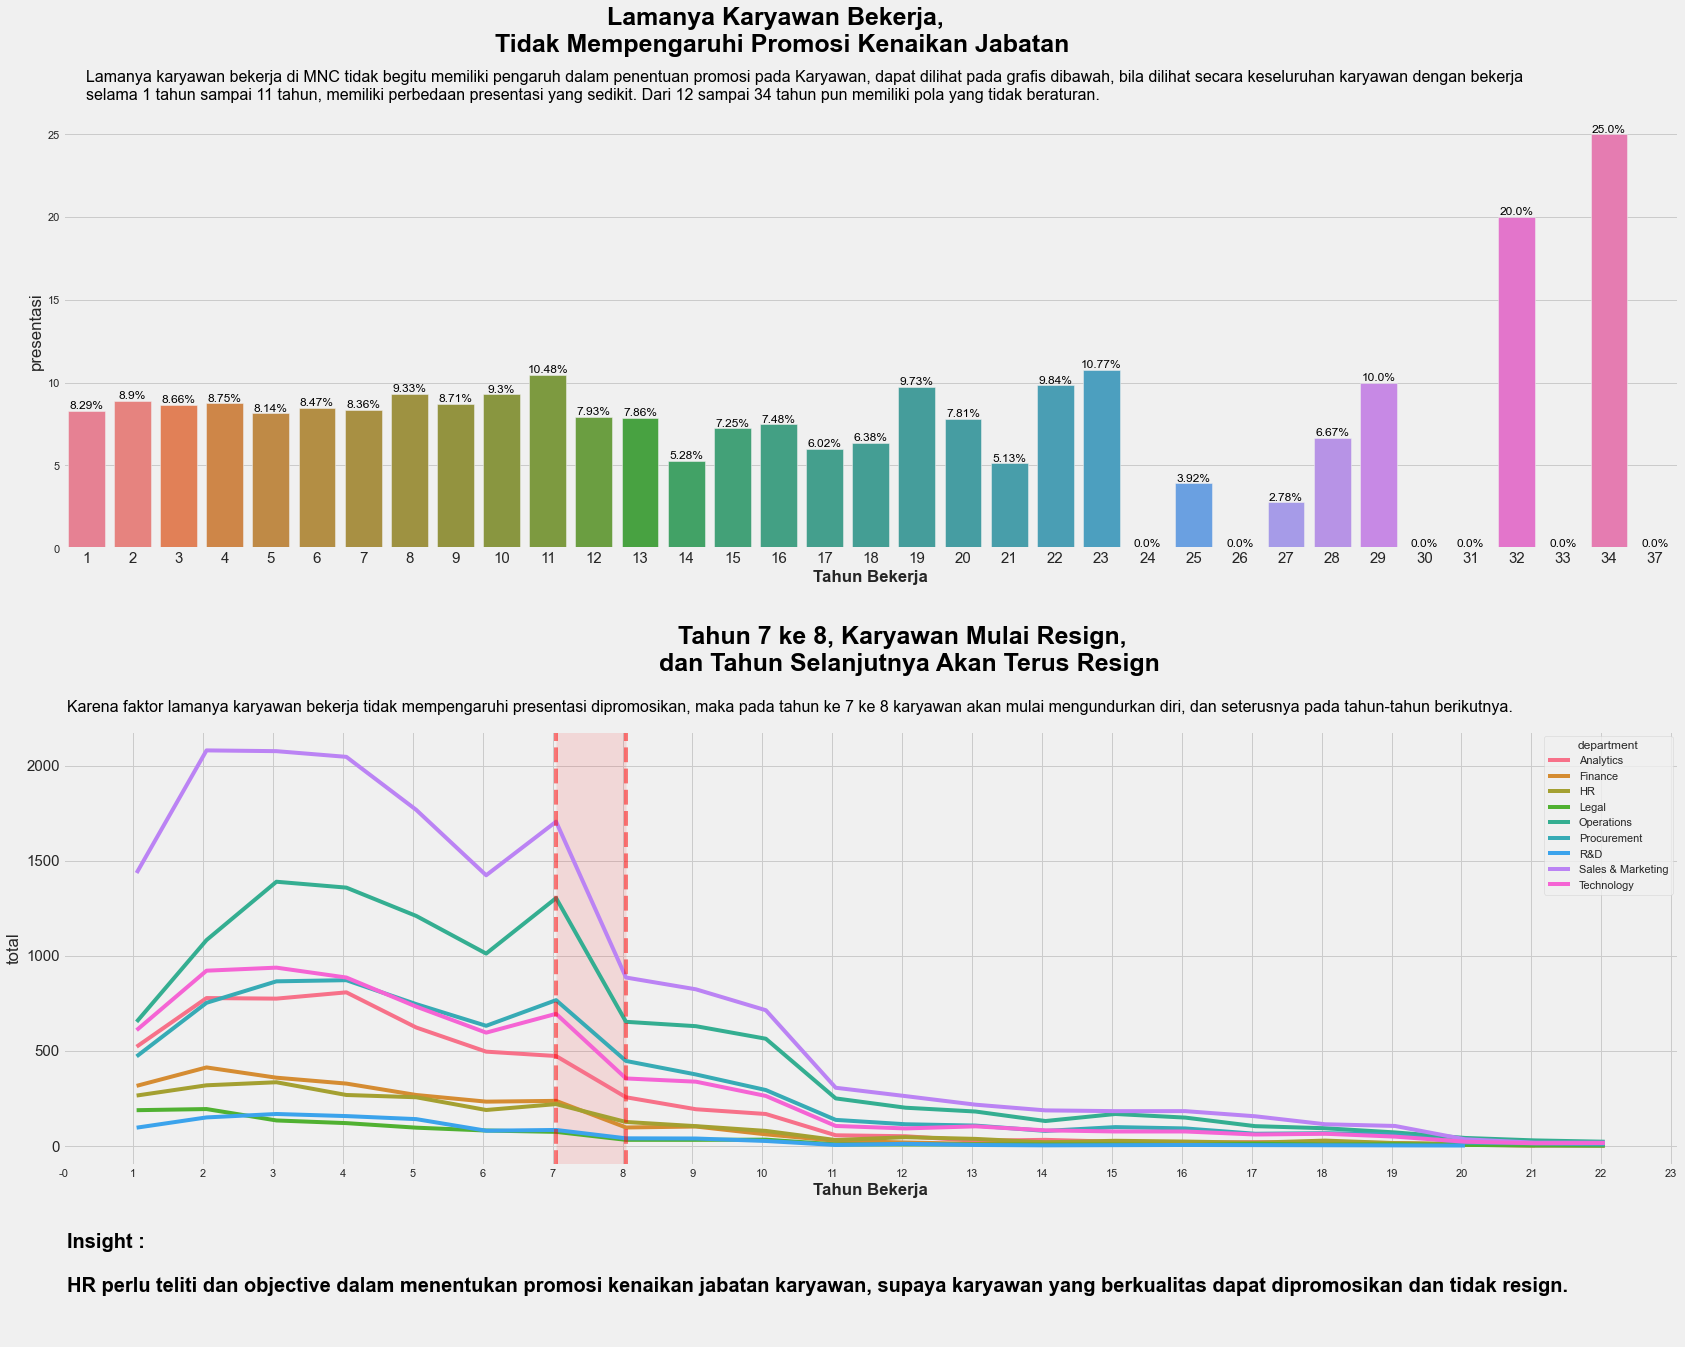

In [22]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(24,20))
import matplotlib.ticker as ticker

sns.barplot(x = 'length_of_service',y='promoted_percentage', data=data_los_1, palette='husl', ax=ax1)
sns.lineplot(x="length_of_service", y="total", hue='department', data=data_los2, palette='husl', ax=ax2)

x = np.arange(len(data_los_1['length_of_service']))
y = data_los_1['promoted_percentage']

for i, v in enumerate(y):
    ax1.text(x[i]-0.00, v+0.0, str(v)+'%', fontsize = 12, color='black', fontweight='normal', ha='center', va='bottom')

ax1.text(15,30,'Lamanya Karyawan Bekerja, \n Tidak Mempengaruhi Promosi Kenaikan Jabatan',horizontalalignment='center',color='black',fontsize=25,fontweight='bold')
text = '''

Lamanya karyawan bekerja di MNC tidak begitu memiliki pengaruh dalam penentuan promosi pada Karyawan, dapat dilihat pada grafis dibawah, bila dilihat secara keseluruhan karyawan dengan bekerja 
selama 1 tahun sampai 11 tahun, memiliki perbedaan presentasi yang sedikit. Dari 12 sampai 34 tahun pun memiliki pola yang tidak beraturan.

'''
ax1.text(0, 25, text,horizontalalignment='left',color='black',fontsize=16,fontweight='normal')

ax2.text(12,2500,'Tahun 7 ke 8, Karyawan Mulai Resign, \n dan Tahun Selanjutnya Akan Terus Resign',horizontalalignment='center',color='black',fontsize=25,fontweight='bold')

text = '''

Karena faktor lamanya karyawan bekerja tidak mempengaruhi presentasi dipromosikan, maka pada tahun ke 7 ke 8 karyawan akan mulai mengundurkan diri, dan seterusnya pada tahun-tahun berikutnya.

'''
ax2.text(0, 2100, text,horizontalalignment='left',color='black',fontsize=16,fontweight='normal')

text = '''
Insight :

HR perlu teliti dan objective dalam menentukan promosi kenaikan jabatan karyawan, supaya karyawan yang berkualitas dapat dipromosikan dan tidak resign.

'''
ax2.text(0, -1000, text,horizontalalignment='left',color='black',fontsize=20,fontweight='bold')


ax2.axvline(7, 0, 1, linestyle='--', color='red', alpha=0.5)
ax2.axvline(8, 0, 1, linestyle='--', color='red', alpha=0.5)
ax2.axvspan(7, 8, facecolor='red', alpha=0.1)

ax1.set_ylabel('presentasi')    
ax1.set_xlabel('Tahun Bekerja', fontweight = 'bold')
ax2.set_ylabel('total')    
ax2.set_xlabel('Tahun Bekerja', fontweight = 'bold')

ax1.xaxis.set_tick_params(labelsize=15)
ax2.yaxis.set_tick_params(labelsize=15)

start, end = ax2.get_xlim()
ax2.xaxis.set_ticks(np.arange(start, end))
ax2.xaxis.set_major_formatter(ticker.FormatStrFormatter('%1.f'))

fig.tight_layout(pad=2.0)
plt.savefig('avg training score.png');

## KPI >80%

In [23]:
data_kpi = data.groupby(['KPIs_met >80%','is_promoted']).agg({'age' : ['count']}).reset_index()
data_kpi.columns = ['KPIs_met >80%','promoted','total']
data_kpi

,KPIs_met >80%,promoted,total
0,0,0,34111
1,0,1,1406
2,1,0,16029
3,1,1,3262


In [24]:
data_kpi_py = data_kpi[data_kpi['promoted']==1]
data_kpi_pn = data_kpi[data_kpi['promoted']==0]

In [25]:
data_kpi_py = data_kpi_py.drop(['promoted'],axis = 1)
data_kpi_pn = data_kpi_pn.drop(['promoted'],axis = 1)

In [26]:
data_kpi_py.columns=['KPI >80%','promoted_yes']
data_kpi_pn.columns=['KPI >80%','promoted_no']

In [27]:
data_kpi_1 = data_kpi_py.merge(data_kpi_pn,
          on = 'KPI >80%',
          how = 'inner'
          )

In [28]:
data_kpi_1

,KPI >80%,promoted_yes,promoted_no
0,0,1406,34111
1,1,3262,16029


In [29]:
data_kpi_1['total'] = data_kpi_1['promoted_yes'] + data_kpi_1['promoted_no']
data_kpi_1['promoted_percentage'] = (data_kpi_1['promoted_yes'] / data_kpi_1['total']) * 100
data_kpi_1['not_promoted_percentage'] = (data_kpi_1['promoted_no'] / data_kpi_1['total']) * 100
data_kpi_1 = data_kpi_1.round(2)
data_kpi_1.sort_values(['promoted_percentage'], ascending = False)

,KPI >80%,promoted_yes,promoted_no,total,promoted_percentage,not_promoted_percentage
1,1,3262,16029,19291,16.91,83.09
0,0,1406,34111,35517,3.96,96.04


In [30]:
data_kpi_1['total_percentage'] = (data_kpi_1['total'] / data_kpi_1['total'].sum()) * 100
data_kpi_1 = data_kpi_1.round(2)

In [31]:
data_kpi_1

,KPI >80%,promoted_yes,promoted_no,total,promoted_percentage,not_promoted_percentage,total_percentage
0,0,1406,34111,35517,3.96,96.04,64.8
1,1,3262,16029,19291,16.91,83.09,35.2


In [32]:
data_kpi_1['KPI >80%'] = data_kpi_1['KPI >80%'].replace([0,1],['Tidak Mencapai KPI','Mencapai KPI'])

In [33]:
data_kpi_1

,KPI >80%,promoted_yes,promoted_no,total,promoted_percentage,not_promoted_percentage,total_percentage
0,Tidak Mencapai KPI,1406,34111,35517,3.96,96.04,64.8
1,Mencapai KPI,3262,16029,19291,16.91,83.09,35.2


In [34]:
data_cat_1 = data.groupby(['department', 'KPIs_met >80%']).agg({'age' : ['count']}).reset_index()
data_cat_1.columns = ['department', 'KPI', 'total']

data_cat_py = data_cat_1[data_cat_1['KPI']==1]
data_cat_pn = data_cat_1[data_cat_1['KPI']==0]

data_cat_py = data_cat_py.drop(['KPI'],axis = 1)
data_cat_pn = data_cat_pn.drop(['KPI'],axis = 1)

data_cat_py.columns=['department','yes']
data_cat_pn.columns=['department','no']

data_cat_1 = data_cat_py.merge(data_cat_pn,
          on = 'department',
          how = 'inner'
          )

data_cat_1['total'] = data_cat_1['yes'] + data_cat_1['no']
data_cat_1['percentage'] = (data_cat_1['yes'] / data_cat_1['total']) * 100
data_cat_1 = data_cat_1.round(2)
data_cat_1 = data_cat_1.sort_values(['percentage'], ascending = True)

data_cat_1

,department,yes,no,total,percentage
7,Sales & Marketing,4464,12376,16840,26.51
3,Legal,347,692,1039,33.40
2,HR,808,1610,2418,33.42
8,Technology,2458,4680,7138,34.44
5,Procurement,2695,4443,7138,37.76
0,Analytics,2163,3189,5352,40.41
1,Finance,1052,1484,2536,41.48
6,R&D,416,583,999,41.64
4,Operations,4888,6460,11348,43.07


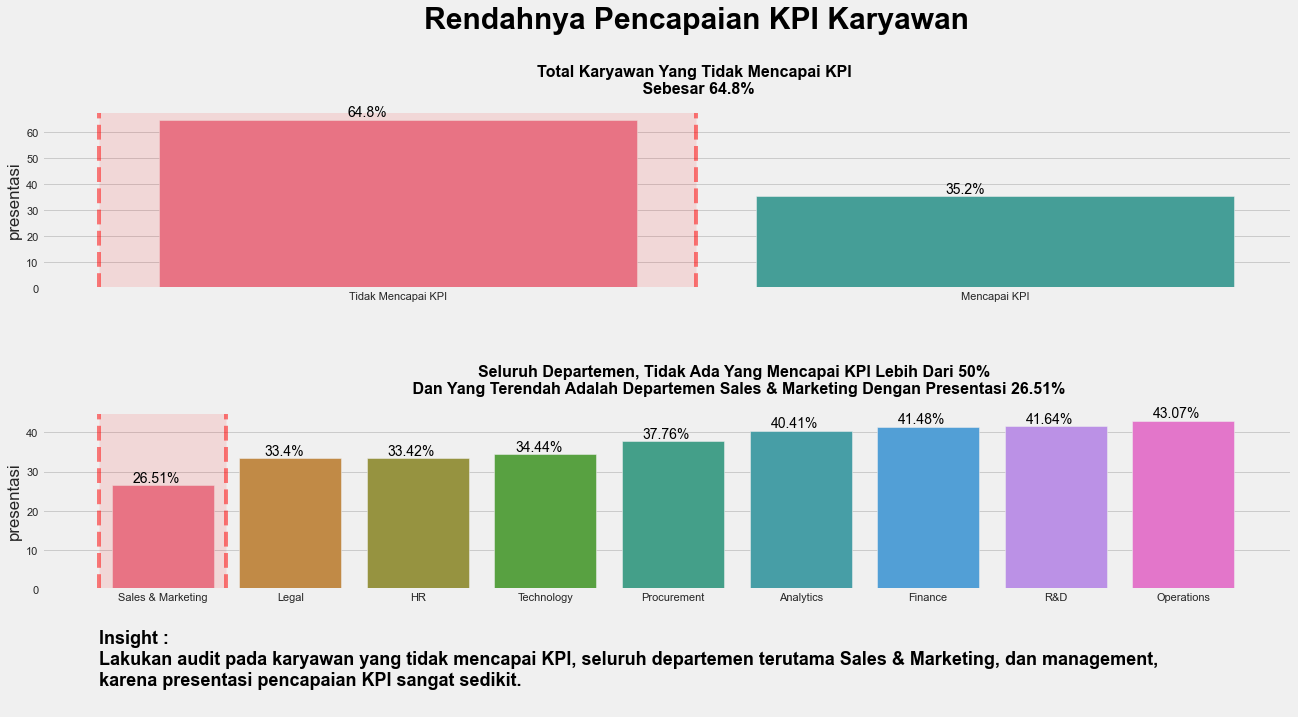

In [35]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(19,14))

#sns.barplot(x='KPI >80%',y='promoted_percentage',data=data_kpi_1, palette='husl',ax=ax1)
sns.barplot(x='KPI >80%',y='total_percentage',data=data_kpi_1, palette='husl',ax=ax1)
sns.barplot(x='department',y='percentage',data=data_cat_1, palette='husl',ax=ax2)

x = np.arange(len(data_kpi_1['KPI >80%']))
y = data_kpi_1['total_percentage']
z = data_kpi_1['promoted_percentage']
x1 = np.arange(len(data_cat_1['department']))
a =data_cat_1['percentage']

#for i, v in enumerate(z):
    #ax1.text(x[i]-0.05, v+0.1, str(v)+'%', fontsize = 14, color='black', fontweight='normal', ha='center', va='bottom')

for i, v in enumerate(y):
    ax1.text(x[i]-0.05, v+0.1, str(v)+'%', fontsize = 14, color='black', fontweight='normal', ha='center', va='bottom')
    
for i, v in enumerate(a):
    ax2.text(x1[i]-0.05, v+0.1, str(v)+'%', fontsize = 14, color='black', fontweight='normal', ha='center', va='bottom')
    
#ax1.text(0.5,21,'Karyawan Yang Mencapai KPI Memiliki \n Presentasi Dipromosikan Lebih Besar',horizontalalignment='center',color='black',fontsize=16,fontweight='bold')

ax1.text(0.5,75,'Total Karyawan Yang Tidak Mencapai KPI \n Sebesar 64.8%',horizontalalignment='center',color='black',fontsize=16,fontweight='bold')
ax1.text(0.5,100,'Rendahnya Pencapaian KPI Karyawan',horizontalalignment='center',color='black',fontsize=30,fontweight='bold')

ax2.text(4.5,50,'Seluruh Departemen, Tidak Ada Yang Mencapai KPI Lebih Dari 50% \n Dan Yang Terendah Adalah Departemen Sales & Marketing Dengan Presentasi 26.51%',horizontalalignment='center',color='black',fontsize=16,fontweight='bold')
text = '''
Insight :
Lakukan audit pada karyawan yang tidak mencapai KPI, seluruh departemen terutama Sales & Marketing, dan management,
karena presentasi pencapaian KPI sangat sedikit.
'''
ax2.text(-0.5, -30, text,horizontalalignment='left',color='black',fontsize=18,fontweight='bold')


ax1.axvline(-0.5, 0, 1, linestyle='--', color='red', alpha=0.5)
ax1.axvline(0.5, 0, 1, linestyle='--', color='red', alpha=0.5)
ax1.axvspan(-0.5, 0.5, facecolor='red', alpha=0.1)

ax2.axvline(-0.5, 0, 1, linestyle='--', color='red', alpha=0.5)
ax2.axvline(0.5, 0, 1, linestyle='--', color='red', alpha=0.5)
ax2.axvspan(-0.5, 0.5, facecolor='red', alpha=0.1)

ax1.set_ylabel('presentasi')    
ax1.set_xlabel('')
ax2.set_ylabel('presentasi')    
ax2.set_xlabel('')

fig.tight_layout(pad=3.0)
plt.savefig('KPI.png')


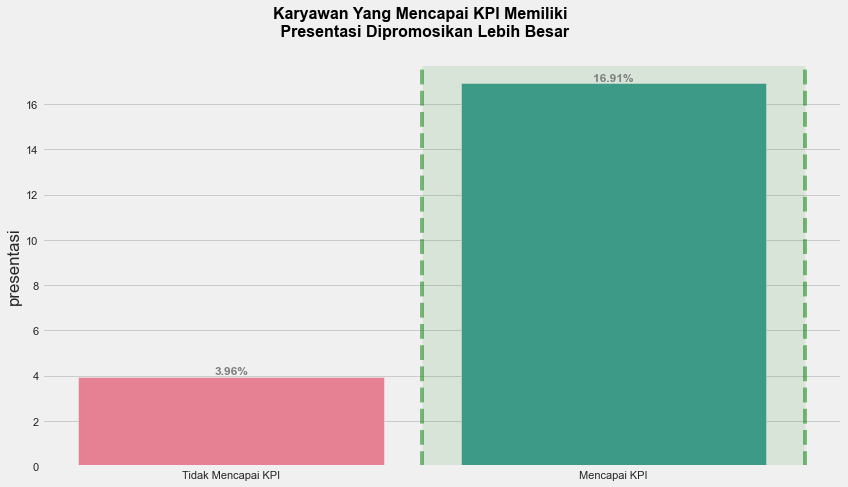

In [36]:
fig, ax = plt.subplots(figsize=(12,7))

sns.barplot(x='KPI >80%',y='promoted_percentage',data=data_kpi_1, palette='husl')

x = np.arange(len(data_kpi_1['KPI >80%']))
y = data_kpi_1['promoted_percentage']

for i, v in enumerate(y):
    ax.text(x[i]- 0.0, v+0.0, str(v)+'%', fontsize = 12, color='grey', fontweight='bold',
           ha='center', va='bottom')

ax.text(0.5,19,'Karyawan Yang Mencapai KPI Memiliki \n Presentasi Dipromosikan Lebih Besar',horizontalalignment='center',color='black',fontsize=16,fontweight='bold')
    

ax.axvline(0.5, 0, 1, linestyle='--', color='green', alpha=0.5)
ax.axvline(1.5, 0, 1, linestyle='--', color='green', alpha=0.5)
ax.axvspan(0.5, 1.5, facecolor='green', alpha=0.1)

plt.ylabel('')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.ylabel('presentasi')
plt.xlabel('')
plt.tight_layout()
plt.savefig('KPI1.png')

## Promotion On Previous Year Rating

In [37]:
data_pyr = data.groupby(['previous_year_rating','is_promoted']).agg({'age' : ['count']}).reset_index()
data_pyr.columns = ['previous_year_rating','promoted','total']
data_pyr

,previous_year_rating,promoted,total
0,1.0,0,6135
1,1.0,1,88
2,2.0,0,4044
3,2.0,1,181
4,3.0,0,17263
5,3.0,1,1355
6,4.0,0,9093
7,4.0,1,784
8,5.0,0,9820
9,5.0,1,1921


In [38]:
data_pyr_py = data_pyr[data_pyr['promoted']==1]
data_pyr_pn = data_pyr[data_pyr['promoted']==0]

In [39]:
data_pyr_py = data_pyr_py.drop(['promoted'],axis = 1)
data_pyr_pn = data_pyr_pn.drop(['promoted'],axis = 1)

In [40]:
data_pyr_py.columns=['previous_year_rating','promoted_yes']
data_pyr_pn.columns=['previous_year_rating','promoted_no']

In [41]:
data_pyr_1 = data_pyr_py.merge(data_pyr_pn,
          on = 'previous_year_rating',
          how = 'inner'
          )

In [42]:
data_pyr_1

,previous_year_rating,promoted_yes,promoted_no
0,1.0,88,6135
1,2.0,181,4044
2,3.0,1355,17263
3,4.0,784,9093
4,5.0,1921,9820


In [43]:
data_pyr_1['total'] = data_pyr_1['promoted_yes'] + data_pyr_1['promoted_no']
data_pyr_1['promoted_percentage'] = (data_pyr_1['promoted_yes'] / data_pyr_1['total']) * 100
data_pyr_1 = data_pyr_1.round(2)
data_pyr_1.sort_values(['promoted_percentage'], ascending = False)

,previous_year_rating,promoted_yes,promoted_no,total,promoted_percentage
4,5.0,1921,9820,11741,16.36
3,4.0,784,9093,9877,7.94
2,3.0,1355,17263,18618,7.28
1,2.0,181,4044,4225,4.28
0,1.0,88,6135,6223,1.41


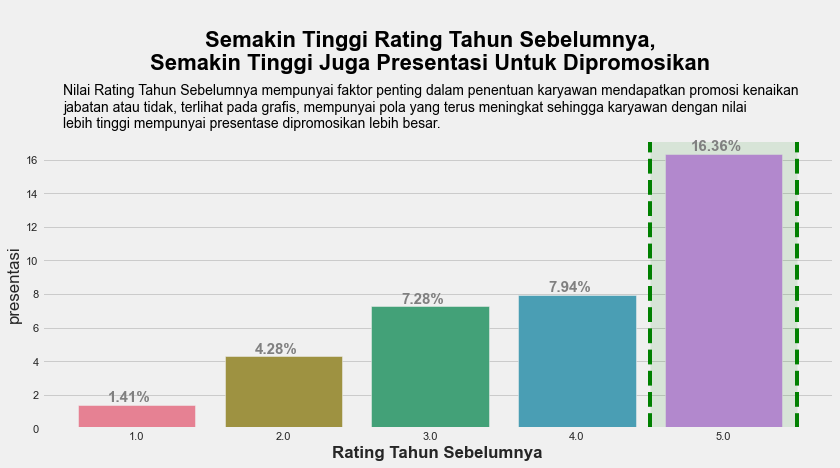

In [44]:
fig, ax = plt.subplots(figsize=(12,7))

sns.barplot(x = 'previous_year_rating',y='promoted_percentage', palette='husl', data=data_pyr_1)

x = np.arange(len(data_pyr_1['previous_year_rating']))
y = data_pyr_1['promoted_percentage']

for i, v in enumerate(y):
    ax.text(x[i]- 0.05, v+0, str(v)+'%', fontsize = 15, color='grey', fontweight='bold',
           ha = 'center', va = 'bottom')

plt.axvline(3.5, 0, 1, linestyle='--', color='green')
plt.axvline(4.5, 0, 1, linestyle='--', color='green')
plt.axvspan(3.5, 4.5, facecolor='green', alpha=0.1)

title = '''
Semakin Tinggi Rating Tahun Sebelumnya,
Semakin Tinggi Juga Presentasi Untuk Dipromosikan
'''
ax.text(2,20,title,horizontalalignment='center',color='black',fontsize=22,fontweight='bold')
    

text = '''

Nilai Rating Tahun Sebelumnya mempunyai faktor penting dalam penentuan karyawan mendapatkan promosi kenaikan 
jabatan atau tidak, terlihat pada grafis, mempunyai pola yang terus meningkat sehingga karyawan dengan nilai
lebih tinggi mempunyai presentase dipromosikan lebih besar.

'''

ax.text(-0.5, 16,text,horizontalalignment='left',color='black',fontsize=14,fontweight='normal')

plt.ylabel('presentasi')
plt.xlabel('Rating Tahun Sebelumnya', fontweight='bold')
plt.tight_layout()
plt.savefig('Previous Year Rating.png')

## Promotion On Avg Training Score

In [45]:
data_ats = data.groupby(['avg_training_score','is_promoted']).agg({'employee_id' : ['count']}).reset_index()
data_ats.columns = ['avg_training_score','promoted','total']
data_ats

,avg_training_score,promoted,total
0,39,0,2
1,40,0,5
2,41,0,25
3,41,1,1
4,42,0,60
...,...,...,...
111,96,0,1
112,96,1,47
113,97,1,49
114,98,1,37


In [46]:
data_atspy = data_ats[data_ats['promoted']==1]
data_atspn = data_ats[data_ats['promoted']==0]

In [47]:
data_atspy = data_atspy.drop(['promoted'],axis = 1)
data_atspn = data_atspn.drop(['promoted'],axis = 1)

In [48]:
data_atspy.columns=['avg_training_score','promoted_yes']
data_atspn.columns=['avg_training_score','promoted_no']

In [49]:
data_ats_1 = data_atspy.merge(data_atspn,
          on = 'avg_training_score',
          how = 'outer'
          )

In [50]:
data_ats_1.tail(20)

,avg_training_score,promoted_yes,promoted_no
41,82,151.0,1296.0
42,83,127.0,1071.0
43,84,120.0,1048.0
44,85,105.0,967.0
45,86,120.0,792.0
46,87,84.0,571.0
47,88,82.0,362.0
48,89,84.0,217.0
49,90,79.0,106.0
50,91,76.0,41.0


In [51]:
data_ats_1['promoted_yes'].fillna(0, inplace=True)
data_ats_1['promoted_no'].fillna(0, inplace=True)
data_ats_1['total'] = data_ats_1['promoted_yes'] + data_ats_1['promoted_no']
data_ats_1['promoted_percentage'] = (data_ats_1['promoted_yes'] / data_ats_1['total']) * 100
data_ats_1 = data_ats_1.round(2)
data_ats_1 = data_ats_1.sort_values(['promoted_percentage'], ascending = True)
data_ats_1 = data_ats_1.tail(20)

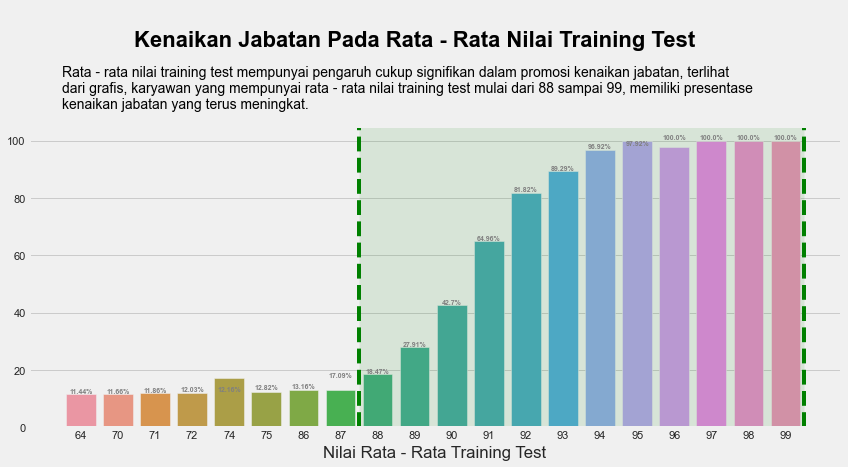

In [52]:
fig, ax = plt.subplots(figsize=(12,7))

sns.barplot(x = 'avg_training_score',y='promoted_percentage', data=data_ats_1)

x = np.arange(len(data_ats_1['avg_training_score']))
y = data_ats_1['promoted_percentage']

for i, v in enumerate(y):
    ax.text(x[i] - 0.0, v+0.0, str(v) + '%', fontsize = 7, color='grey', fontweight='bold',
           ha='center', va='bottom')

ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.axvline(7.5, 0, 1, linestyle='--', color='green')
plt.axvline(19.5, 0, 1, linestyle='--', color='green')
plt.axvspan(7.5, 19.5, facecolor='green', alpha=0.1)

title = '''
Kenaikan Jabatan Pada Rata - Rata Nilai Training Test
'''
ax.text(9,125,title,horizontalalignment='center',color='black',fontsize=22,fontweight='bold')
    

text = '''

Rata - rata nilai training test mempunyai pengaruh cukup signifikan dalam promosi kenaikan jabatan, terlihat 
dari grafis, karyawan yang mempunyai rata - rata nilai training test mulai dari 88 sampai 99, memiliki presentase 
kenaikan jabatan yang terus meningkat. 

'''

ax.text(-0.5, 100,text,horizontalalignment='left',color='black',fontsize=14,fontweight='normal')

plt.ylabel('')
plt.xlabel('Nilai Rata - Rata Training Test')
#plt.xticks(range(0, 99, 100))
plt.tight_layout()
plt.savefig('avg training score.png');

## Promotion On Regional

In [53]:
data_reg = data.groupby(['region','is_promoted']).agg({'employee_id' : ['count']}).reset_index()
data_reg.columns = ['region' , 'is_promoted' , 'jumlah']

data_reg = pd.pivot_table(data_reg,
                           index = ['region'],
                           columns = ['is_promoted'],
                           values = ['jumlah']
                          ).reset_index()
data_reg.columns = ['region','not_promoted','promoted']

data_reg['jumlah'] = data_reg['not_promoted'] + data_reg['promoted']
data_reg['promotion_rate'] = round((data_reg['promoted']/data_reg['jumlah'])*100,2)
data_reg = data_reg.sort_values(['promotion_rate'],ascending=False).reset_index(drop=True)

data_reg_top = data_reg.head(5)
data_reg_bot = data_reg.tail(5)

data_reg_lima = pd.concat([data_reg_top,data_reg_bot]).reset_index(drop=True)
data_reg_lima

,region,not_promoted,promoted,jumlah,promotion_rate
0,region_4,1457,246,1703,14.45
1,region_17,687,109,796,13.69
2,region_25,716,103,819,12.58
3,region_28,1164,154,1318,11.68
4,region_23,1038,137,1175,11.66
5,region_33,259,10,269,3.72
6,region_24,490,18,508,3.54
7,region_18,30,1,31,3.23
8,region_34,284,8,292,2.74
9,region_9,412,8,420,1.90


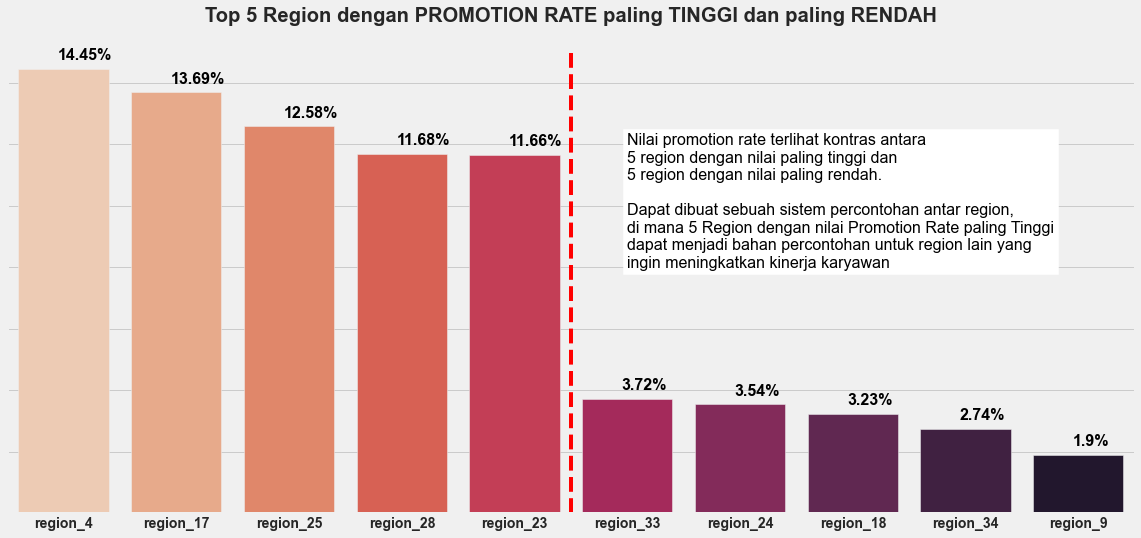

In [54]:
fig, ax = plt.subplots(figsize=(18,8))

sns.barplot(x='region',y='promotion_rate',data=data_reg_lima, palette='rocket_r')

x = np.arange(len(data_reg_lima['region']))
y = data_reg_lima['promotion_rate']

for i, v in enumerate(y):
    ax.text(x[i]- 0.05, v+0.3, str(v)+'%', fontsize = 16, color='black', fontweight='bold')
    
ax.set_ylabel('')    
ax.set_xlabel('')
ax.set_xticklabels(data_reg_lima['region'],fontsize=14,fontweight='bold')
ax.set_yticklabels('')
plt.axvline(4.5,0,1,linestyle='--',color='red')
plt.title('Top 5 Region dengan PROMOTION RATE paling TINGGI dan paling RENDAH',fontweight='bold',pad=25)

text = '''Nilai promotion rate terlihat kontras antara
5 region dengan nilai paling tinggi dan
5 region dengan nilai paling rendah.

Dapat dibuat sebuah sistem percontohan antar region,
di mana 5 Region dengan nilai Promotion Rate paling Tinggi
dapat menjadi bahan percontohan untuk region lain yang
ingin meningkatkan kinerja karyawan'''

ax.text(5,8,text,horizontalalignment='left',color='black',fontsize=16,fontweight='normal',backgroundcolor='white');

#plt.savefig('Categorical Region.png');

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


# Missing Data

In [56]:
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [57]:
data_missing_value = data.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(data))*100,2)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,previous_year_rating,4124,7.52
1,education,2409,4.40


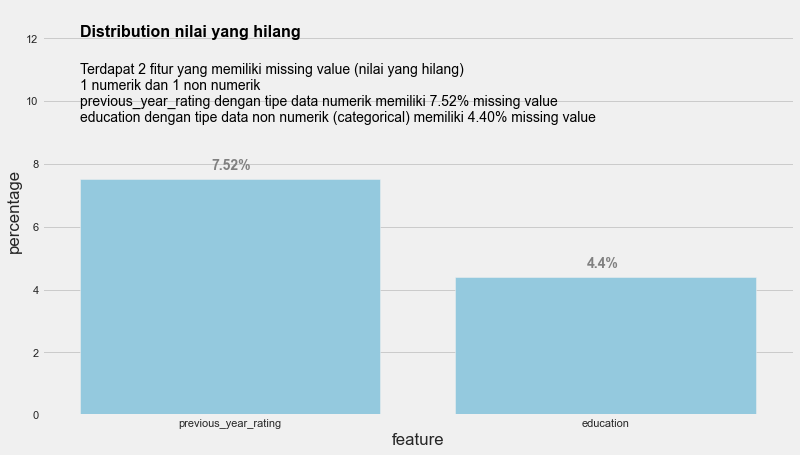

In [58]:
fig, ax = plt.subplots(figsize=(12,7))

sns.barplot(x = 'feature',y='percentage',data=data_missing_value, color = 'skyblue')

x = np.arange(len(data_missing_value['feature']))
y = data_missing_value['percentage']

for i, v in enumerate(y):
    ax.text(x[i]- 0.05, v+0.3, str(v)+'%', fontsize = 14, color='grey', fontweight='bold')
    
title = '''
Distribution nilai yang hilang
'''
ax.text(-0.4,11.5,title,horizontalalignment='left',color='black',fontsize=16,fontweight='bold')
    

text = '''
Terdapat 2 fitur yang memiliki missing value (nilai yang hilang)
1 numerik dan 1 non numerik
previous_year_rating dengan tipe data numerik memiliki 7.52% missing value
education dengan tipe data non numerik (categorical) memiliki 4.40% missing value

'''
ax.text(-0.4,8.3,text,horizontalalignment='left',color='black',fontsize=14,fontweight='normal')
    
ax.set_ylim(0,13)

ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.tight_layout

plt.savefig('Distribution nilai yang hilang.png')

## Pre Processing

In [59]:
data = pd.read_csv('train_LZdllcl.csv')

In [60]:
data.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [62]:
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

$\textbf{We Have 2 Column That Have A Null Data}$


- $\textbf{education}$ <br>
we're going to fill education by mode, because it's a categorical


- $\textbf{previous_year_rating}$ <br>
we're going to fill previous_year_rating by mode, because it has a symmetrical distribution


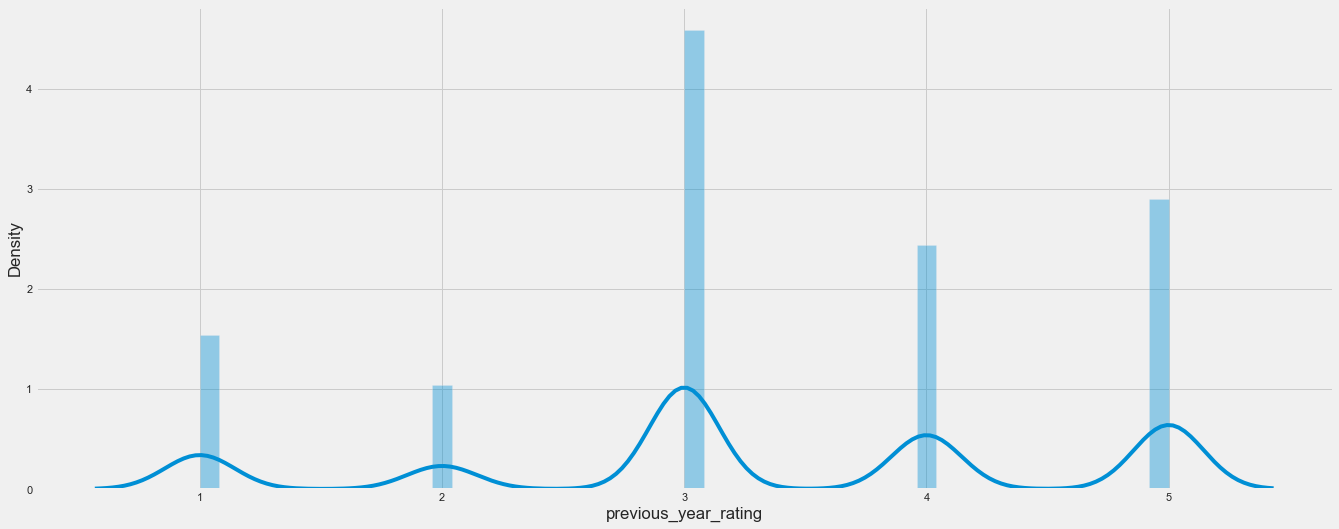

In [63]:
sns.distplot(data['previous_year_rating']);

In [64]:
data['previous_year_rating'] = data['previous_year_rating'].fillna(data['previous_year_rating'].mode()[0])

In [65]:
data['education'] = data['education'].fillna(data['education'].mode()[0])

In [66]:
data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

# Duplicated Data

### Delete The Duplicated Data

In [67]:
data.duplicated().sum()

0

In [68]:
data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,29,1.0,2,0,0,45,0


# Feature Categorical Encoding

### Transform The Categorical Data to Numeric Using Label Encoder

In [69]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(data['department'])
data['department_le'] = le.transform(data['department'])
le.fit(data['region'])
data['region_le'] = le.transform(data['region'])
le.fit(data['education'])
data['education_le'] = le.transform(data['education'])
le.fit(data['gender'])
data['gender_le'] = le.transform(data['gender'])
le.fit(data['recruitment_channel'])
data['recruitment_channel_le'] = le.transform(data['recruitment_channel'])

In [70]:
data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_le,region_le,education_le,gender_le,recruitment_channel_le
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,7,31,2,0,2
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,4,14,0,1,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,7,10,0,1,2
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,7,15,0,1,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,8,18,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0,8,5,0,1,2
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0,4,19,2,0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0,0,0,0,1,0
54806,13614,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,29,1.0,2,0,0,45,0,7,33,0,1,2


# Normalization

### Normalize The Distribution Data Using MinMaxScaler

In [71]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
features = ['department_le','region_le','education_le','gender_le','recruitment_channel_le','no_of_trainings',
            'age','previous_year_rating','length_of_service','KPIs_met >80%','avg_training_score','is_promoted']
for var in features:
    data[var+'_norm'] = MinMaxScaler().fit_transform(data[var].values.reshape(len(data),1))

In [72]:
data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,...,education_le_norm,gender_le_norm,recruitment_channel_le_norm,no_of_trainings_norm,age_norm,previous_year_rating_norm,length_of_service_norm,KPIs_met >80%_norm,avg_training_score_norm,is_promoted_norm
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,...,1.0,0.0,1.0,0.000000,0.375,1.00,0.194444,1.0,0.166667,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,...,0.0,1.0,0.0,0.000000,0.250,1.00,0.083333,0.0,0.350000,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,...,0.0,1.0,1.0,0.000000,0.350,0.50,0.166667,0.0,0.183333,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,...,0.0,1.0,0.0,0.111111,0.475,0.00,0.250000,0.0,0.183333,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,...,0.0,1.0,0.0,0.000000,0.625,0.50,0.027778,0.0,0.566667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,...,0.0,1.0,1.0,0.000000,0.700,0.50,0.444444,0.0,0.650000,0.0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,...,1.0,0.0,0.0,0.000000,0.425,0.25,0.138889,0.0,0.283333,0.0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,...,0.0,1.0,0.0,0.000000,0.175,1.00,0.055556,1.0,0.666667,0.0
54806,13614,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,29,1.0,2,...,0.0,1.0,1.0,0.000000,0.225,0.00,0.027778,0.0,0.100000,0.0


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   employee_id                  54808 non-null  int64  
 1   department                   54808 non-null  object 
 2   region                       54808 non-null  object 
 3   education                    54808 non-null  object 
 4   gender                       54808 non-null  object 
 5   recruitment_channel          54808 non-null  object 
 6   no_of_trainings              54808 non-null  int64  
 7   age                          54808 non-null  int64  
 8   previous_year_rating         54808 non-null  float64
 9   length_of_service            54808 non-null  int64  
 10  KPIs_met >80%                54808 non-null  int64  
 11  awards_won?                  54808 non-null  int64  
 12  avg_training_score           54808 non-null  int64  
 13  is_promoted     

## Initialization

In [74]:
X = data[['department_le_norm','region_le_norm','education_le_norm','gender_le_norm','recruitment_channel_le_norm','no_of_trainings_norm',
            'age_norm','previous_year_rating_norm','length_of_service_norm','KPIs_met >80%_norm','avg_training_score_norm']] # menggunakan semua feature kecuali target
# x = df_pre[['log_sqft_living']] # hanya menggunakan 1 feature saja
y = data['is_promoted_norm']

### Split Train Test

In [75]:
#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size = 0.3,
                                                random_state = 42)

# Checking The Imbalance On Our Target

In [76]:
print(pd.Series(y_train).value_counts())

0.0    35030
1.0     3335
Name: is_promoted_norm, dtype: int64


### Our Target Is Imbalance
### Balancing The Target Using OverSampling

In [77]:
from imblearn import under_sampling, over_sampling

#X_train = data.drop(['is_promoted'],axis=1)
#y_train = data['is_promoted']

# Undersampling
# X_under, y_under = under_sampling.RandomUnderSampler().fit_resample(X_train, y_train)

# Oversampling
X_over, y_over = over_sampling.RandomOverSampler().fit_resample(X_train, y_train)


In [78]:
#print(pd.Series(y_under).value_counts())

In [79]:
print(pd.Series(y_over).value_counts())

1.0    35030
0.0    35030
Name: is_promoted_norm, dtype: int64


In [80]:
#y_under = y_under.to_frame()
#y_under.tail(2)

In [81]:
y_over = y_over.to_frame()
y_over.head(2)

,is_promoted_norm
0,0.0
1,1.0


In [82]:
data_train = pd.concat([X_over, y_over], axis=1)
data_train

,department_le_norm,region_le_norm,education_le_norm,gender_le_norm,recruitment_channel_le_norm,no_of_trainings_norm,age_norm,previous_year_rating_norm,length_of_service_norm,KPIs_met >80%_norm,avg_training_score_norm,is_promoted_norm
0,1.000,0.090909,0.0,1.0,0.0,0.111111,0.150,0.25,0.055556,0.0,0.633333,0.0
1,0.625,0.454545,0.0,0.0,0.0,0.000000,0.175,0.75,0.083333,1.0,0.550000,1.0
2,0.125,0.606061,0.0,1.0,0.0,0.222222,0.350,0.50,0.138889,1.0,0.283333,0.0
3,0.000,0.939394,0.0,1.0,0.0,0.111111,0.500,1.00,0.222222,1.0,0.733333,0.0
4,0.625,0.242424,0.0,1.0,0.0,0.000000,0.625,0.50,0.444444,0.0,0.483333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
70055,0.875,0.666667,1.0,1.0,0.0,0.000000,0.500,1.00,0.055556,1.0,0.116667,1.0
70056,0.500,0.333333,0.0,1.0,0.0,0.000000,0.400,1.00,0.083333,0.0,0.600000,1.0
70057,0.000,0.181818,0.0,1.0,0.0,0.000000,0.225,0.50,0.194444,0.0,0.883333,1.0
70058,0.000,0.939394,0.0,1.0,0.0,0.111111,0.250,1.00,0.083333,1.0,0.750000,1.0


In [83]:
data_train.duplicated().sum()

31770

## Initialization

In [84]:
X_train = data_train[['department_le_norm','region_le_norm','education_le_norm','gender_le_norm','recruitment_channel_le_norm','no_of_trainings_norm',
            'age_norm','previous_year_rating_norm','length_of_service_norm','KPIs_met >80%_norm','avg_training_score_norm']] # menggunakan semua feature kecuali target
# x = df_pre[['log_sqft_living']] # hanya menggunakan 1 feature saja
y_train = data_train['is_promoted_norm']

## Machine Learning Model

### Looking The Best Model That Fit Our Dataset

In [85]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# logistic regression
logreg = LogisticRegression(random_state=42)
# knn
knn = KNeighborsClassifier(n_neighbors=4)
#decision tree
dt = DecisionTreeClassifier(random_state=42)
#random forest
rf = RandomForestClassifier(random_state=42)
#xgb
gb = GradientBoostingClassifier(random_state=42)
#adaboost
ab = AdaBoostClassifier(random_state=42)

#fit model
logreg.fit(X_train, y_train)
knn.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
ab.fit(X_train, y_train)

# Predict the test data
y_predicted_logreg = logreg.predict(X_test)
y_predicted_knn = knn.predict(X_test)
y_predicted_dt = dt.predict(X_test)
y_predicted_rf = rf.predict(X_test)
y_predicted_gb = gb.predict(X_test)
y_predicted_ab = ab.predict(X_test)

## Data Train & Data Test Accuracy Score

In [86]:
ml_score = pd.DataFrame({"Data Train":[logreg.score(X_train,y_train),
                                       knn.score(X_train,y_train),
                                       dt.score(X_train,y_train),
                                       rf.score(X_train,y_train),
                                       gb.score(X_train,y_train),
                                      ab.score(X_train,y_train)],
                        "Data Test":[logreg.score(X_test,y_test),
                                       knn.score(X_test,y_test),
                                       dt.score(X_test,y_test),
                                       rf.score(X_test,y_test),
                                       gb.score(X_test,y_test),
                                    ab.score(X_test,y_test)]}, 
                  index=['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'AdaBoost'])

In [87]:
ml_score['Result'] = np.where((ml_score['Data Train']<ml_score['Data Test']) & (ml_score['Data Test']>=0.8), 'Good',
                           np.where(ml_score['Data Train']>ml_score['Data Test'],'Over Fitting','Under Fitting'))

In [88]:
ml_score

,Data Train,Data Test,Result
Logistic Regression,0.707394,0.699021,Over Fitting
KNN,0.972495,0.857325,Over Fitting
Decision Tree,0.999843,0.903424,Over Fitting
Random Forest,0.999843,0.929697,Over Fitting
Gradient Boosting,0.814573,0.714529,Over Fitting
AdaBoost,0.766643,0.765250,Over Fitting


### Because Our Dataset Is Imbalance So We Are Going To Use AUC As Our Metrics

## AUC

In [89]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_predicted_logreg, pos_label=1)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_predicted_knn, pos_label=1)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_predicted_dt, pos_label=1)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_predicted_rf, pos_label=1)
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_predicted_gb, pos_label=1)
fpr_ab, tpr_ab, thresholds_ab = roc_curve(y_test, y_predicted_ab, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


In [90]:
from sklearn.metrics import roc_auc_score, auc

# auc scores
auc_score_logreg = auc(fpr_logreg, tpr_logreg)
auc_score_knn = auc(fpr_knn, tpr_knn)
auc_score_dt = auc(fpr_dt, tpr_dt)
auc_score_rf = auc(fpr_rf, tpr_rf)
auc_score_gb = auc(fpr_gb, tpr_gb)
auc_score_ab = auc(fpr_ab, tpr_ab)

In [91]:
auc_score =  pd.DataFrame({"AUC Score": [auc_score_logreg,
                                         auc_score_knn,
                                         auc_score_dt,
                                         auc_score_rf,
                                         auc_score_gb,
                                        auc_score_ab]}, 
                  index=['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'AdaBoost'])

In [92]:
auc_score = auc_score.round(2)
auc_score

,AUC Score
Logistic Regression,0.71
KNN,0.67
Decision Tree,0.68
Random Forest,0.66
Gradient Boosting,0.82
AdaBoost,0.76


## Machine Learning Evaluation

In [93]:
from sklearn.metrics import precision_score, recall_score
evaluation_score =  pd.DataFrame({"Precision": [precision_score(y_test, y_predicted_logreg, average='macro'),
                                         precision_score(y_test, y_predicted_knn, average='macro'),
                                         precision_score(y_test, y_predicted_dt, average='macro'),
                                         precision_score(y_test, y_predicted_rf, average='macro'),
                                         precision_score(y_test, y_predicted_gb, average='macro'),
                                        precision_score(y_test, y_predicted_ab, average='macro')],
                                 "Recall": [recall_score(y_test, y_predicted_logreg, average='macro'),
                                           recall_score(y_test, y_predicted_knn, average='macro'),
                                           recall_score(y_test, y_predicted_dt, average='macro'),
                                           recall_score(y_test, y_predicted_rf, average='macro'),
                                           recall_score(y_test, y_predicted_gb, average='macro'),
                                           recall_score(y_test, y_predicted_ab, average='macro')]}, 
                  index=['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'AdaBoost'])

In [94]:
evaluation_score['F1 Score'] = (evaluation_score.Precision + evaluation_score.Recall) / 2
evaluation_score = evaluation_score.round(2)

In [95]:
evaluation_score

,Precision,Recall,F1 Score
Logistic Regression,0.57,0.71,0.64
KNN,0.61,0.67,0.64
Decision Tree,0.68,0.68,0.68
Random Forest,0.78,0.66,0.72
Gradient Boosting,0.60,0.82,0.71
AdaBoost,0.60,0.76,0.68


### Because Gradient Boosting Have The Best Score in AUC and Recall, So We Going To Use Gradient Boosting As Our Machine Learning Model

### Gradient Boosting Classifier

In [96]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [97]:
# Predict the test data
y_predicted = gb.predict(X_test)

In [98]:
from sklearn.metrics import classification_report, confusion_matrix
print('\nconfustion matrix') # generate the confusion matrix
print(confusion_matrix(y_test, y_predicted))

from sklearn.metrics import accuracy_score
print('\naccuracy')
print(accuracy_score(y_test, y_predicted))

from sklearn.metrics import classification_report
print('\nclassification report')
print(classification_report(y_test, y_predicted)) # generate the precision, recall, f-1 score, num


confustion matrix
[[10488  4622]
 [   72  1261]]

accuracy
0.714528978896795

classification report
              precision    recall  f1-score   support

         0.0       0.99      0.69      0.82     15110
         1.0       0.21      0.95      0.35      1333

    accuracy                           0.71     16443
   macro avg       0.60      0.82      0.58     16443
weighted avg       0.93      0.71      0.78     16443



### Hyper Parameter Tuning Gradient Boosting

In [ ]:
from sklearn.model_selection import GridSearchCV
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(
    learning_rate=0.1, 
    min_samples_split=600,
    min_samples_leaf=100,
    max_depth=8,
    max_features='sqrt',
    subsample=0.8,
    random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
best_model = gsearch1.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

### Hyper Parameter Tuning Make It Less Better

### Save Machine Learning Model

In [ ]:
import pickle
gb_best_model = gb.fit(X_train, y_train)
pickle.dump(gb_best_model, open('GBoost_model.pkl', 'wb'))

loaded_model = pickle.load(open('GBoost_model.pkl', 'rb'))
result = loaded_model.score(X_test,y_test)

# Deployment

In [ ]:
new_data = pd.read_csv("test_2umaH9m.csv")
new_data.head()

In [ ]:
new_data_copy = new_data.copy()
new_data_copy.head()

In [ ]:
#see the amount of data in the dataset
print('there are ' + str(len(new_data_copy)) + ' rows of data in the dataset')

In [ ]:
new_data_copy.duplicated().sum()

In [ ]:
new_data_copy.isnull().sum()

In [ ]:
new_data_copy['education'] = new_data_copy['education'].fillna(new_data_copy['education'].mode()[0])

In [ ]:
new_data_copy['previous_year_rating'] = new_data_copy['previous_year_rating'].fillna(new_data_copy['previous_year_rating'].mode()[0])

In [ ]:
new_data_copy.isnull().sum()

## Feature Categorical Encoding

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(new_data_copy['department'])
new_data_copy['department_le'] = le.transform(new_data_copy['department'])
le.fit(new_data_copy['region'])
new_data_copy['region_le'] = le.transform(new_data_copy['region'])
le.fit(new_data_copy['education'])
new_data_copy['education_le'] = le.transform(new_data_copy['education'])
le.fit(new_data_copy['gender'])
new_data_copy['gender_le'] = le.transform(new_data_copy['gender'])
le.fit(new_data_copy['recruitment_channel'])
new_data_copy['recruitment_channel_le'] = le.transform(new_data_copy['recruitment_channel'])

In [ ]:
new_data_copy

## Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
features = ['department_le','region_le','education_le','gender_le','recruitment_channel_le','no_of_trainings',
            'age','previous_year_rating','length_of_service','KPIs_met >80%','avg_training_score']
for var in features:
    new_data_copy[var+'_norm'] = MinMaxScaler().fit_transform(new_data_copy[var].values.reshape(len(new_data_copy),1))

In [ ]:
new_data_copy.info()

## Drop Unnecessary Columns

In [ ]:
new_data_copy.drop(new_data_copy.iloc[:, 0:18], inplace = True, axis = 1)

In [ ]:
new_data_copy.info()

## Predict with `gb_best_model` fom Gradient Boosting Classifier

In [ ]:
y_test = gb_best_model.predict(new_data_copy)
y_test_prob = gb_best_model.predict_proba(new_data_copy)
results = pd.DataFrame(data = {
    "id": new_data['employee_id'],
    "Promoted": y_test,
    "Probability": y_test_prob[:,1]
})
print(results)
print("The number of Promoted Employee is: " + str(len(results[results["Promoted"] == 1])))

In [ ]:
print('The percentage of employees who get promoted is', str(round((8732/23490)*100,2)), '%')
print('The number of employees who get promoted using XGBoost model are', str(len(results[results["Promoted"] == 1])), 'out of', str(len(new_data_copy)), 'employees')

In [ ]:
results[results['Promoted'] == 1.0]